<a href="https://colab.research.google.com/github/kritsapdev/kritsapdev/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import Dataset
data = pd.read_csv('ecommerce_customer_data_large.csv')  # Replace with your file path
df = pd.DataFrame(data)

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
# Initial inspection
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

(250000, 13)
   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Chu

In [ ]:
# prompt: how to replace missing value  in column name  'Returns  with 0.0

df['Returns'].fillna(0.0, inplace=True)


In [ ]:
# prompt: replace missing value in column Age,Gender,Churn with Imputation K-Nearest Neighbors

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])




In [ ]:
# prompt: replace missing value in Gender and Churn column with Mean/Median/Mode imputation

# Calculate the mode of 'Gender'
mode_gender = df['Gender'].mode()[0]

# Calculate the median of 'Churn'
median_churn = df['Churn'].median()

# Fill missing values using fillna()
df['Gender'].fillna(mode_gender, inplace=True)
df['Churn'].fillna(median_churn, inplace=True)


In [ ]:
print(df.isnull().sum())

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


In [ ]:
# Descriptive statistics
print(df.describe())

         Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  250000.000000  250000.000000  250000.000000          250000.000000   
mean    25017.632092     254.742724       3.004936            2725.385196   
std     14412.515718     141.738104       1.414737            1442.576095   
min         1.000000      10.000000       1.000000             100.000000   
25%     12590.000000     132.000000       2.000000            1476.000000   
50%     25011.000000     255.000000       3.000000            2725.000000   
75%     37441.250000     377.000000       4.000000            3975.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age         Churn  
count  250000.000000  250000.000000  250000.000000  250000.00000  
mean       43.798276       0.405904      43.798276       0.20052  
std        15.364915       0.491067      15.364915       0.40039  
min        18.000000       0.000000   

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Product Category'] = le.fit_transform(df['Product Category'])

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,3,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,2,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,0,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,2,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,0,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
le = LabelEncoder()
df['Payment Method'] = le.fit_transform(df['Payment Method'])

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,3,177,1,2427,2,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,2,174,3,2448,2,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,0,413,1,2345,1,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,2,396,3,937,0,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,0,259,4,2598,2,31,1.0,John Rivera,31,Female,0


In [ ]:
df1 = df

In [ ]:
# prompt: change data type from float to decimal in column Returns

from decimal import Decimal
df1['Returns'] = df1['Returns'].apply(Decimal)
df1.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,3,177,1,2427,2,31,1,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,2,174,3,2448,2,31,1,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,0,413,1,2345,1,31,1,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,2,396,3,937,0,31,0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,0,259,4,2598,2,31,1,John Rivera,31,Female,0


In [ ]:
df = df1

In [ ]:
# prompt: le.fit_transform with Customer Name and Gender Column
df1 = df

le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,3,177,1,2427,2,31,1,18414,31,0,0
1,44605,2021-05-16 13:57:44,2,174,3,2448,2,31,1,18414,31,0,0
2,44605,2020-07-13 06:16:57,0,413,1,2345,1,31,1,18414,31,0,0
3,44605,2023-01-17 13:14:36,2,396,3,937,0,31,0,18414,31,0,0
4,44605,2021-05-01 11:29:27,0,259,4,2598,2,31,1,18414,31,0,0


In [ ]:
# prompt: choose column  Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender ,Churn to new df

df2 = df[['Product Category','Product Price','Quantity','Total Purchase Amount','Payment Method','Age','Returns','Gender','Churn']]
df2.head()


,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Age,Returns,Gender,Churn
0,3,177,1,2427,2,31,1,0,0
1,2,174,3,2448,2,31,1,0,0
2,0,413,1,2345,1,31,1,0,0
3,2,396,3,937,0,31,0,0,0
4,0,259,4,2598,2,31,1,0,0


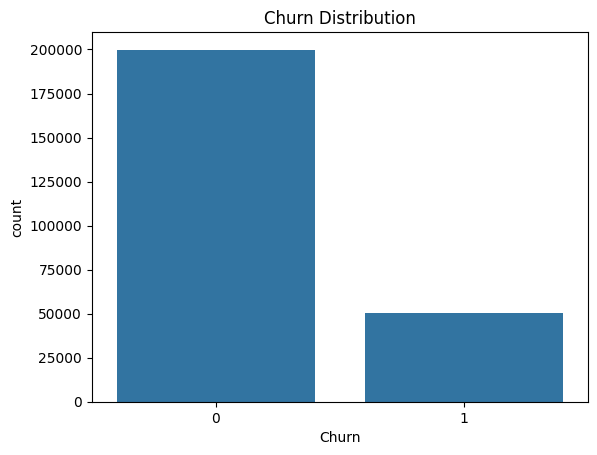

In [ ]:
# Data visualization
sns.countplot(x='Churn', data=df2)
plt.title('Churn Distribution')
plt.show()

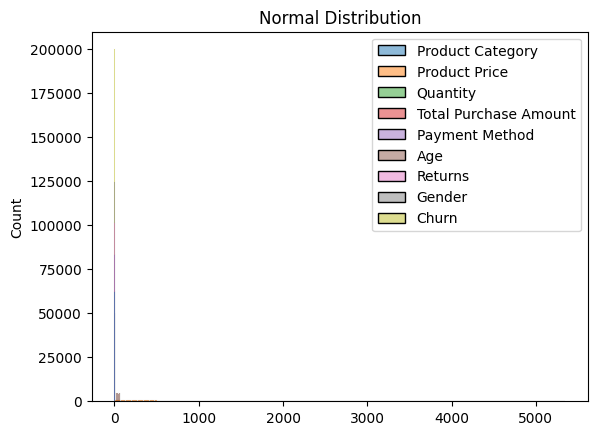

In [ ]:
sns.histplot(df2)
plt.hist(df2['Churn'])
plt.title('Normal Distribution')
plt.show()


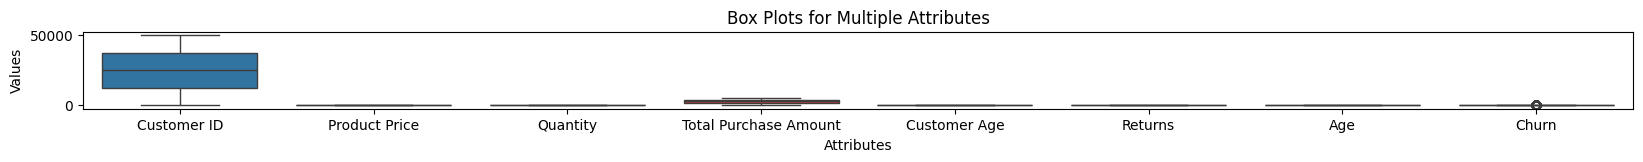

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df2)
plt.title('Box Plots for Multiple Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()